Loading Data

In [1]:
import pandas as pd
from pathlib import Path

In [2]:
from src.data_import import load_data

df = load_data("/Users/carolfarah/final_projext_yas/final_project/Huntington_Disease_Dataset.csv")


Data Cleaning

In [3]:
from src.data_cleaning import select_columns, strip_spaces_columns, normalize_case_columns, gene_filter, convert_numeric_columns, drop_missing_required

columns_list = ["Patient_ID", "Gene/Factor", "Disease_Stage", "Brain_Volume_Loss", "Age", "Sex"]

sub_df = select_columns(df, columns_list) #Columns from original df were selected
sub_df = strip_spaces_columns(sub_df, columns=["Gene/Factor", "Disease_Stage", "Sex"])
sub_df = gene_filter(sub_df, "Gene/Factor", values_list= ["MLH1", "MSH3", "HTT (Somatic Expansion)"])
sub_df = normalize_case_columns(sub_df, columns= ["Gene/Factor", "Disease_Stage", "Sex"])
sub_df = drop_missing_required(sub_df, columns_list)
print(sub_df)




                                 Patient_ID              Gene/Factor  \
2      66ab0567-050b-4d56-9ec4-b676309899a6                     msh3   
3      996a48e4-e841-418f-a539-5a7a86cd815d                     msh3   
4      d45c7ca8-7125-4aaa-8018-5bbc60d35a1f  htt (somatic expansion)   
5      38cea144-1280-42cb-9362-dbf0f4aafe3b                     msh3   
6      10760159-d219-4a4f-b374-f25ebeb1f9a6                     mlh1   
...                                     ...                      ...   
48531  27f82b73-b9fe-49d6-b6b9-82e667054725                     msh3   
48532  ff5af7cc-8132-4791-8e8b-aac71f2bade1  htt (somatic expansion)   
48533  f594aab8-7acf-43cd-95d8-c197e202c4ea                     msh3   
48534  32052e20-c2ae-4314-95ce-5daf720b26ca  htt (somatic expansion)   
48535  b063b8fb-9e12-40c2-b6bb-da675033dfd2  htt (somatic expansion)   

         Disease_Stage  Brain_Volume_Loss  Age     Sex  
2                early               2.82   69    male  
3      pre-symptomati

Remove outliers

In [4]:
# from src.data_cleaning import check_influence_cooks_distance
# from statsmodels.formula.api import ols
# from src.statistical_analysis import factor_categorical, summarize, descriptive_table_two_way


# sub_df = factor_categorical(sub_df, "Sex", "Disease_Stage")


# result = check_influence_cooks_distance(
#     sub_df, 
#     dv="Brain_Volume_Loss", 
#     categorical=["Sex", "Disease_Stage"], 
#     continuous=[]
# )
# top_influential = result["influential_rows"].sort_values("cooks_distance", ascending=False)
# # sub_df["cooks_distance"] = result["influential_rows"]["cooks_distance"]
# print(top_influential.head(10))

# # Cook's distance threshold
# print("Threshold:", result["threshold"])


Descriptive Statistics

In [5]:
from src.statistical_analysis import factor_categorical, summarize, descriptive_table_two_way
sub_df = factor_categorical(sub_df, "Sex", "Disease_Stage")
descriptive_table = descriptive_table_two_way(sub_df, "Brain_Volume_Loss", "Sex", "Disease_Stage")
print(descriptive_table)

       Sex    Disease_Stage      level_2  Brain_Volume_Loss
0   female            early            N        4524.000000
1   female            early      Mean_DV           5.274069
2   female            early        SD_DV           1.854868
3   female            early        SE_DV           0.027577
4   female            early  CI_95_Lower           5.220004
5   female            early  CI_95_Upper           5.328134
6   female             late            N        4476.000000
7   female             late      Mean_DV           5.271834
8   female             late        SD_DV           1.864946
9   female             late        SE_DV           0.027875
10  female             late  CI_95_Lower           5.217185
11  female             late  CI_95_Upper           5.326484
12  female           middle            N        4543.000000
13  female           middle      Mean_DV           5.249115
14  female           middle        SD_DV           1.888106
15  female           middle        SE_DV

/Users/carolfarah/final_projext_yas/final_project/src/statistical_analysis.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([factor_a, factor_b])[dv]


2 WAY ANOVA Graph

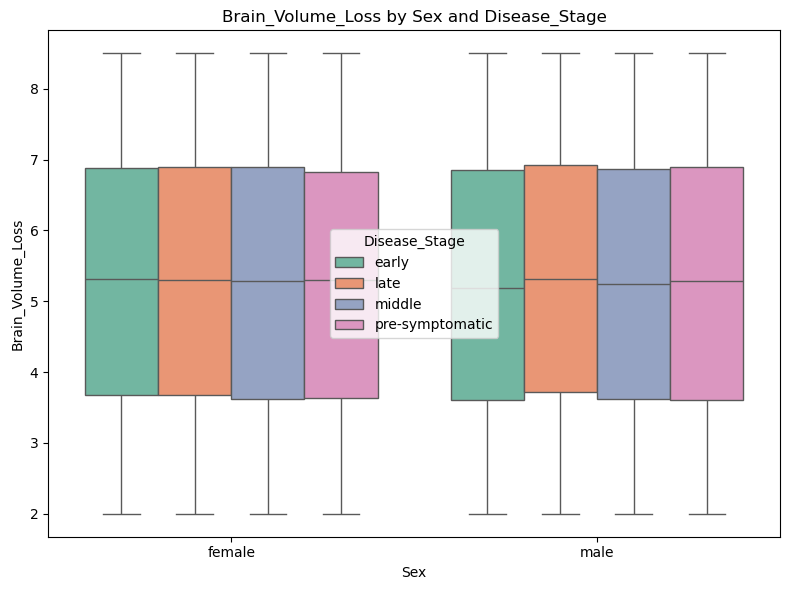

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_visualization import boxplot_two_factor

# def boxplot_two_factor(df, dv, factor_a, factor_b,
#                        title=None, ylabel=None, xlabel=None,
#                        figsize=(8,6), palette="Set2"):
    
graph = boxplot_two_factor(sub_df,"Brain_Volume_Loss", "Sex", "Disease_Stage", title=None, ylabel=None, xlabel=None,
                       figsize=(8,6), palette="Set2")



ANCOVA descriptives

In [7]:
from src.statistical_analysis import descriptive_table_ancova
descriptive_table_ANCOVA = descriptive_table_two_way(sub_df, "Brain_Volume_Loss", "Disease_Stage", "Age")
# def descriptive_table_ancova(df, dv, iv, covariate, ci=0.95):
print(descriptive_table_ANCOVA)


        Disease_Stage  Age      level_2  Brain_Volume_Loss
0               early   30            N         188.000000
1               early   30      Mean_DV           5.291649
2               early   30        SD_DV           1.890750
3               early   30        SE_DV           0.137897
4               early   30  CI_95_Lower           5.019615
...               ...  ...          ...                ...
1219  pre-symptomatic   80      Mean_DV           5.080576
1220  pre-symptomatic   80        SD_DV           1.879044
1221  pre-symptomatic   80        SE_DV           0.135963
1222  pre-symptomatic   80  CI_95_Lower           4.812385
1223  pre-symptomatic   80  CI_95_Upper           5.348766

[1224 rows x 4 columns]


/Users/carolfarah/final_projext_yas/final_project/src/statistical_analysis.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([factor_a, factor_b])[dv]


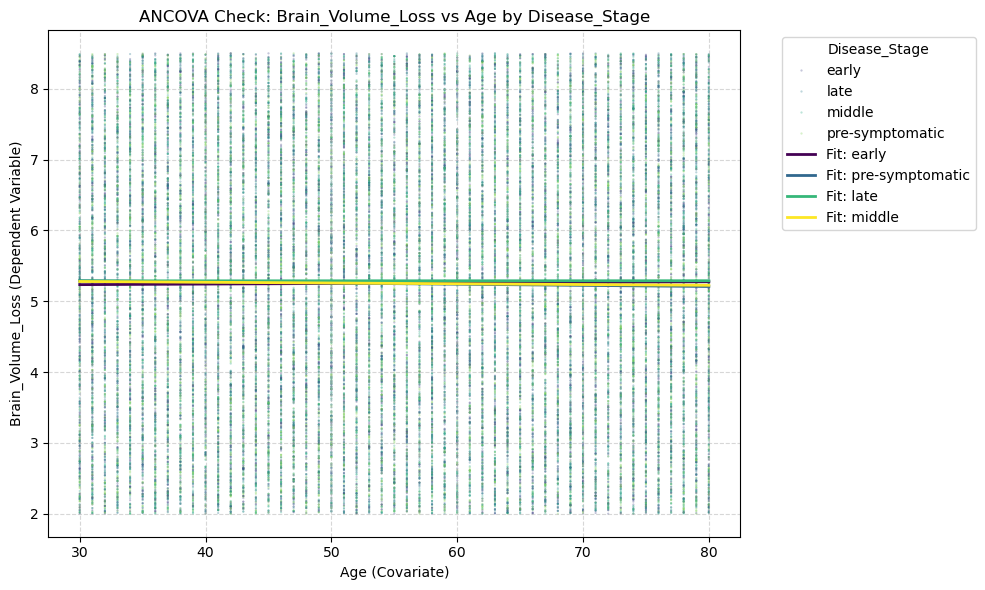

In [8]:
from src.data_visualization import plot_ancova_linearity

ancova_graph = plot_ancova_linearity(sub_df, dv="Brain_Volume_Loss", iv="Disease_Stage", cov="Age")

In [9]:
from src.statistical_assumptions import check_independence_duplicates

duplicates_df = check_independence_duplicates(sub_df,"Patient_ID")

print(duplicates_df)

Empty DataFrame
Columns: [Patient_ID, Gene/Factor, Disease_Stage, Brain_Volume_Loss, Age, Sex]
Index: []


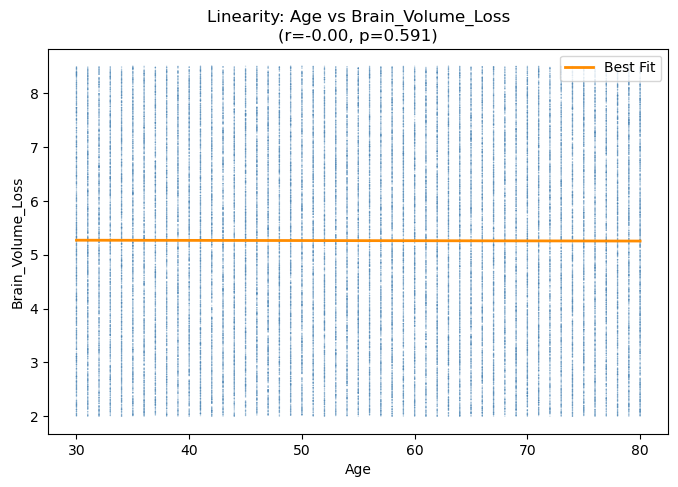

In [10]:
from src.statistical_assumptions import check_linearity_age_dv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# def check_linearity_age_dv(df, dv="brain-volume-loss", cov="age", show_plot=True):


linearity_check = check_linearity_age_dv(df, dv="Brain_Volume_Loss", cov="Age", show_plot=True)

Homogeneity of regression slope

In [11]:
from src.statistical_assumptions import check_homogeneity_of_slopes
from statsmodels.formula.api import ols
import statsmodels.api as sm


homogeneity_of_slopes_table = check_homogeneity_of_slopes(sub_df, "Brain_Volume_Loss", "Disease_Stage", "Age")

print(homogeneity_of_slopes_table)


                                       sum_sq       df         F    PR(>F)
C(Q('Disease_Stage'))                9.265440      3.0  0.880784  0.450123
Q('Age')                             1.727919      1.0  0.492774  0.482697
C(Q('Disease_Stage')):Q('Age')       7.100802      3.0  0.675011  0.567233
Residual                        127282.871926  36299.0       NaN       NaN


Homogeneity of Variance

In [12]:
from src.statistical_assumptions import levene_test
from scipy.stats import levene

# ancova_levene = levene_test(sub_df,"Brain_Volume_Loss", "Disease_Stage", center="mean", dropna=True, min_group_size=2)

# print(ancova_levene)


Normality of Residuals (ANCOVA)

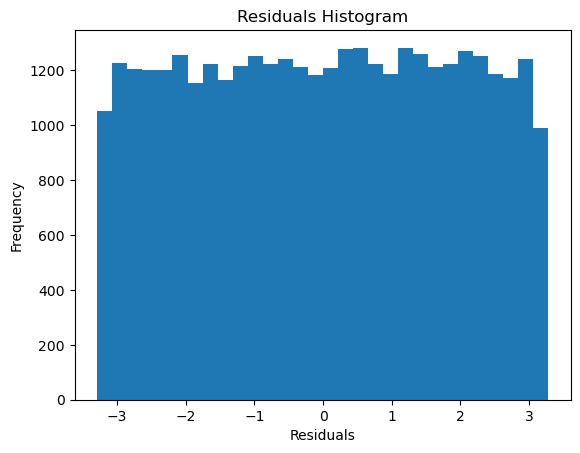

<Figure size 640x480 with 0 Axes>

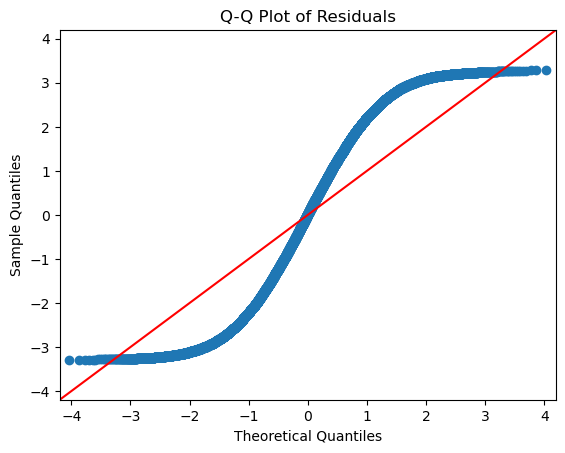

In [13]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from src.statistical_assumptions import check_normality_of_residuals_visual


residuals_normality_check = check_normality_of_residuals_visual(sub_df, "Brain_Volume_Loss", "Disease_Stage", "Age")



In [14]:
from src.statistical_assumptions import log_transform, sqrt_transform
# def log_transform(
#     df,
#     column,
#     new_column=None,
#     offset="auto"
# ):
# sub_df, offset = log_transform(
#     sub_df,
#     column="Brain_Volume_Loss",
#     new_column="log_transformation"
# )

sub_df_sqrt, offset = sqrt_transform(
    sub_df,
    column="Brain_Volume_Loss",
    new_column="transformsqrt"
)

print("Offset used:", offset)# print(sub_df)


Offset used: 0


                                 Patient_ID              Gene/Factor  \
2      66ab0567-050b-4d56-9ec4-b676309899a6                     msh3   
3      996a48e4-e841-418f-a539-5a7a86cd815d                     msh3   
4      d45c7ca8-7125-4aaa-8018-5bbc60d35a1f  htt (somatic expansion)   
5      38cea144-1280-42cb-9362-dbf0f4aafe3b                     msh3   
6      10760159-d219-4a4f-b374-f25ebeb1f9a6                     mlh1   
...                                     ...                      ...   
48531  27f82b73-b9fe-49d6-b6b9-82e667054725                     msh3   
48532  ff5af7cc-8132-4791-8e8b-aac71f2bade1  htt (somatic expansion)   
48533  f594aab8-7acf-43cd-95d8-c197e202c4ea                     msh3   
48534  32052e20-c2ae-4314-95ce-5daf720b26ca  htt (somatic expansion)   
48535  b063b8fb-9e12-40c2-b6bb-da675033dfd2  htt (somatic expansion)   

         Disease_Stage  Brain_Volume_Loss  Age     Sex  transformsqrt  
2                early               2.82   69    male       1.

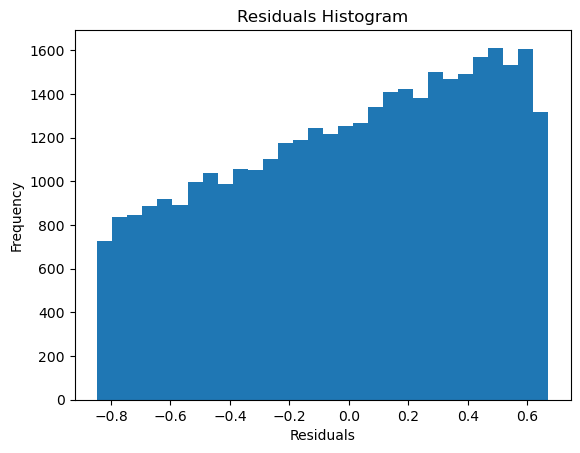

<Figure size 640x480 with 0 Axes>

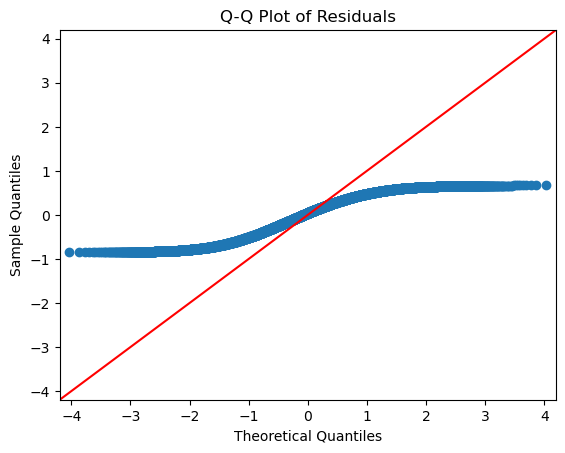

In [15]:
print(sub_df_sqrt)
# residuals_normality_check = check_normality_of_residuals_visual(sub_df, "log_transformation", "Disease_Stage", "Age")
residuals_normality_check = check_normality_of_residuals_visual(sub_df_sqrt, "transformsqrt", "Disease_Stage", "Age")


statistical analysis


In [16]:
from src.statistical_analysis import run_ancova
# def run_moderated_regression(df, dv, iv, covariate, levene_test):
levene_test_results = "not"
run_ancova(sub_df_sqrt, "transformsqrt", "Disease_Stage",
           ["Age"], levene_test_results)


(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1459fb830>,
                        sum_sq       df         F    PR(>F)  partial_eta_sq
 C(Disease_Stage)     0.504347      3.0  0.936039  0.422177        0.000077
 Age                  0.103120      1.0  0.574156  0.448617        0.000016
 Residual          6519.959590  36302.0       NaN       NaN        0.500000)

TWO-Way ANOVA

In [17]:
from src.statistical_analysis import anova_model
# def anova_model(df, dv, factor1, factor2, levene_test, check_interaction):


anova_two_way = anova_model(sub_df, "Brain_Volume_Loss", "Sex", "Disease_Stage", levene_test="insignificant", check_interaction= True)
print(anova_two_way)


                                sum_sq       df             F    PR(>F)
Intercept                125838.715918      1.0  35886.336138  0.000000
C(Sex)                        3.350430      1.0      0.955466  0.328338
C(Disease_Stage)              2.842005      3.0      0.270158  0.846959
C(Sex):C(Disease_Stage)       5.931511      3.0      0.563844  0.638822
Residual                 127285.759447  36299.0           NaN       NaN


In [18]:
additive_model = anova_model(sub_df, "Brain_Volume_Loss", "Sex", "Disease_Stage", levene_test="insignificant", check_interaction= False)
print(additive_model)


                         sum_sq       df         F    PR(>F)
C(Sex)                 0.009690      1.0  0.002763  0.958076
C(Disease_Stage)       9.261159      3.0  0.880389  0.450328
Residual          127291.690958  36302.0       NaN       NaN
